### It is an simple example using simple python code to (1) get news reports of Hong Kong and Singapore from Google's GDELT project. (2) extract sentiment and top words of news reports. (3) visualize the results.

In [63]:
# Input the following code to install: ! pip install gdeltdoc

In [70]:
# gdeltdoc library documentation: https://pypi.org/project/gdeltdoc/

### 1. Article search

In [73]:
# load packages gdeltdoc:
import pandas as pd
from gdeltdoc import GdeltDoc, Filters

# Define the keywords and time range
keywords = "Hong Kong"
start_date = '2018-01-01'
end_date = '2022-12-31'

# Create a filter for the specified keywords and date range
article_filter = Filters(keyword=keywords, start_date=start_date, end_date=end_date)

# Initialize the GdeltDoc client
gd = GdeltDoc()

# Search for articles matching the filter
articles = gd.article_search(article_filter)

In [74]:
# check the results:
articles.head()

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
0,http://edu.people.com.cn/n1/2022/1004/c1006-32...,,香港未来可期 青年大有可为 -- 教育 -- 人民网,20221004T024500Z,,edu.people.com.cn,Chinese,China
1,https://www.wenweipo.com/a/202210/03/AP633a449...,,文匯社評 | 選香港專家上太空 激勵兩地創科發展 - 社評,20221003T024500Z,https://dw-media.wenweipo.com/dams/wwpproduct/...,wenweipo.com,Chinese,China
2,http://www.hkcna.hk/./docDetail.jsp?id=1001846...,,香港海洋公園舉行 哈囉喂全園祭2022 開幕禮 | 頭條,20221006T103000Z,,hkcna.hk,Chinese,Hong Kong
3,https://www.setn.com/News.aspx?NewsID=1186911,https://www.setn.com/m/ampnews.aspx?NewsID=118...,台港聯手救浪浪 ！ 聽儷赴港寵物展義賣 捐助愛護動物協會 | 生活 | 三立新聞網 SETN...,20221003T053000Z,https://attach.setn.com/newsimages/2022/10/03/...,setn.com,Chinese,Taiwan
4,http://news.cyol.com/gb/articles/2022-10/04/co...,,香港各界 ： 在港选拔载荷专家体现国家的支持和信任,20221004T064500Z,,news.cyol.com,Chinese,China


In [75]:
# frequency of sourcecountry:
articles.sourcecountry.value_counts()

sourcecountry
China             139
Hong Kong          76
Singapore          14
Taiwan             11
United States       3
South Korea         3
India               1
Malaysia            1
Thailand            1
United Kingdom      1
Name: count, dtype: int64

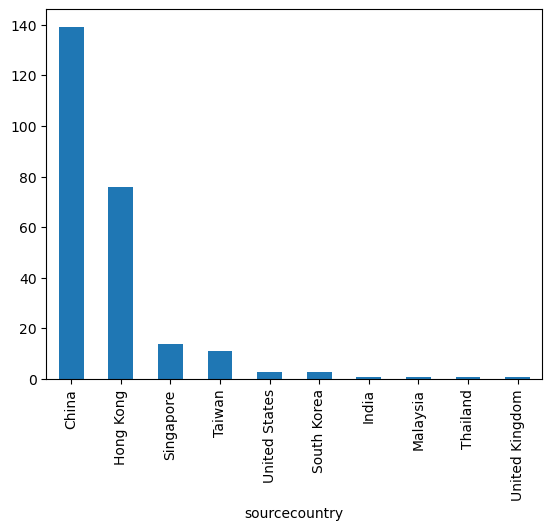

In [76]:
# show the distribution plot:
articles.sourcecountry.value_counts().plot(kind='bar');

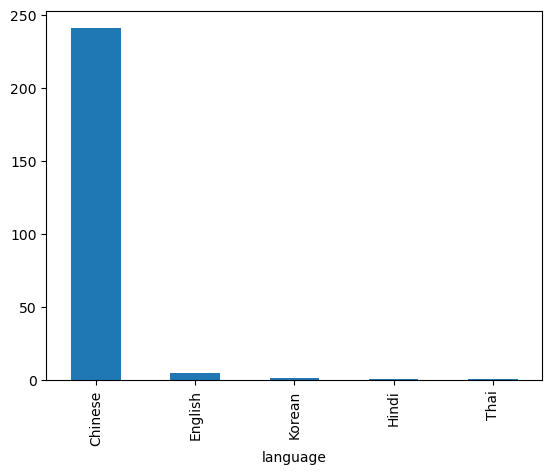

In [77]:
# caluclate the frequency of language:
articles.language.value_counts()
# plot the distribution plot:
articles.language.value_counts().plot(kind='bar');

### 2. Timeline Search

There are 5 available modes when making a timeline search:

timelinevol - a timeline of the volume of news coverage matching the filters, represented as a percentage of the total news articles monitored by GDELT. timelinevolraw - similar to timelinevol, but has the actual number of articles and a total rather than a percentage timelinelang - similar to timelinevol but breaks the total articles down by published language. Each language is returned as a separate column in the DataFrame. timelinesourcecountry - similar to timelinevol but breaks the total articles down by the country they were published in. Each country is returned as a separate column in the DataFrame. timelinetone - a timeline of the average tone of the news coverage matching the filters. See GDELT's documentation for more information about the tone metric.

In [85]:
# using time line search:
# Define the keywords and time range
keywords = ["Hong Kong","Singapore"]
start_date = '2018-01-01'
end_date = '2022-12-31'

# Create a filter for the specified keywords and date range
timeline_filter = Filters(keyword=keywords, start_date=start_date, end_date=end_date)

# Initialize the GdeltDoc client
gd = GdeltDoc()

# Search for articles matching the filter
tl_volume = gd.timeline_search("timelinevol",timeline_filter)

In [86]:
tl_volume.head()

,datetime,Volume Intensity
0,2018-01-01 00:00:00+00:00,1.5597
1,2018-01-02 00:00:00+00:00,1.5930
2,2018-01-03 00:00:00+00:00,1.4014
3,2018-01-04 00:00:00+00:00,1.3833
4,2018-01-05 00:00:00+00:00,1.4927


In [87]:
# write a function for timeline search with keywords and date range:
def timeline_search(keywords, start_date, end_date):
    """
    This function performs a timeline search based on keywords and date range.

    Args:
    - keywords: list of keywords to search for
    - start_date: start date for the search in 'YYYY-MM-DD' format
    - end_date: end date for the search in 'YYYY-MM-DD' format

    Returns:
    - timeline data with datetime, volume, and intensity
    """
    timeline_filter = Filters(keyword=keywords, start_date=start_date, end_date=end_date)
    gd = GdeltDoc()
    tl_volume = gd.timeline_search("timelinevol", timeline_filter)

    return tl_volume

### 3. Compare timelines

In [92]:
HKT = timeline_search("Hong Kong", "2018-01-01", "2022-12-31")
SGT = timeline_search("Singapore", "2018-01-01", "2022-12-31")

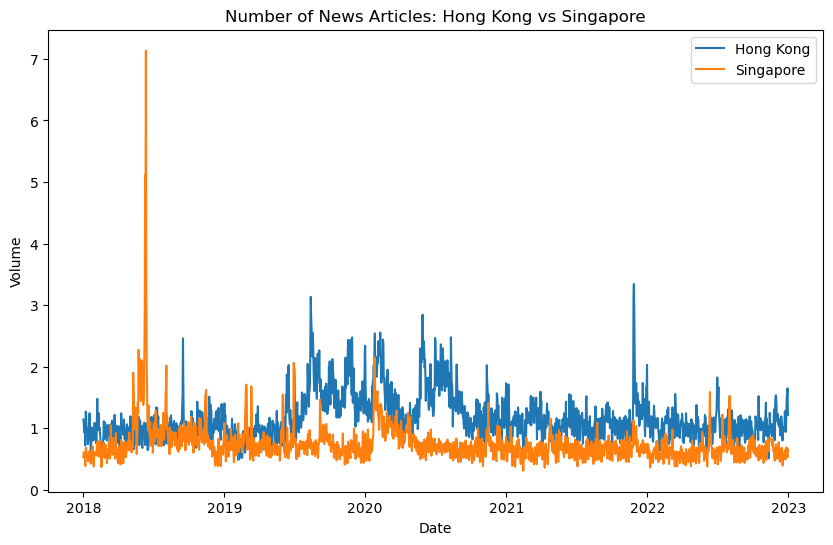

In [93]:
# plot comparison of the two timelines on the same figure:
import matplotlib.pyplot as plt

# Plot comparison of the two timelines on the same figure
plt.figure(figsize=(10, 6))
plt.plot(HKT['datetime'], HKT['Volume Intensity'], label='Hong Kong')
plt.plot(SGT['datetime'], SGT['Volume Intensity'], label='Singapore')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Number of News Articles: Hong Kong vs Singapore')
plt.legend()
plt.show()

In [94]:
# refine the timeline search function to include ONE more parameter: mode:
def timeline_search(keywords, start_date, end_date, mode):
    timeline_filter = Filters(keyword=keywords, start_date=start_date, end_date=end_date)
    gd = GdeltDoc()
    tl_volume = gd.timeline_search(mode, timeline_filter)
    return tl_volume

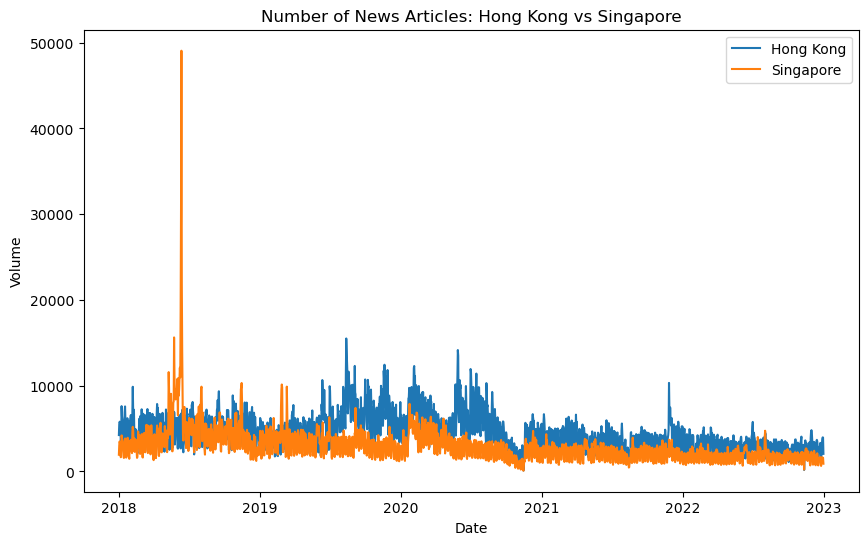

In [95]:
mode = "timelinevolraw"

HKT = timeline_search("Hong Kong", "2018-01-01", "2022-12-31", mode)
SGT = timeline_search("Singapore", "2018-01-01", "2022-12-31", mode)
# Plot comparison of the two timelines on the same figure
plt.figure(figsize=(10, 6))
plt.plot(HKT['datetime'], HKT['Article Count'], label='Hong Kong')
plt.plot(SGT['datetime'], SGT['Article Count'], label='Singapore')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Number of News Articles: Hong Kong vs Singapore')
plt.legend()
plt.show()

In [ ]:
mode = "timelinesourcecountry"

HKT = timeline_search("Hong Kong", "2018-01-01", "2022-12-31", mode)
SGT = timeline_search("Singapore", "2018-01-01", "2022-12-31", mode)

In [ ]:
# print out all HKT columns:
HKT.columns

In [ ]:
# select the singapore intensity column from HKT:
SGT_HKT = HKT[['datetime','Singapore Volume Intensity']]
# select the hong kong intensity column from SGT:
HKT_SGT = SGT[['datetime','Hong Kong Volume Intensity']]
# plot the two timelines on the same figure:
plt.figure(figsize=(10, 6))
plt.plot(SGT_HKT['datetime'], SGT_HKT['Singapore Volume Intensity'], label='SG report HK')
plt.plot(HKT_SGT['datetime'], HKT_SGT['Hong Kong Volume Intensity'], label='HK report SG')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Number of News Articles: Hong Kong vs Singapore')
plt.legend()
plt.show()

In [ ]:
# based on HKT and SGT data, plot the timeline of how China report Hong Kong and Singapore:
# Plot the timeline of how China reports on Hong Kong and Singapore based on HKT and SGT data
plt.figure(figsize=(10, 6))
plt.plot(HKT['datetime'], HKT['China Volume Intensity'], label='Hong Kong')
plt.plot(SGT['datetime'], SGT['China Volume Intensity'], label='Singapore')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('China Reporting: Hong Kong vs Singapore')
plt.legend()
plt.show()

In [ ]:
mode = "timelinetone"

HKT = timeline_search("Hong Kong", "2018-01-01", "2022-12-31", mode)
SGT = timeline_search("Singapore", "2018-01-01", "2022-12-31", mode)
# Plot comparison of the two timelines on the same figure
plt.figure(figsize=(10, 6))
plt.plot(HKT['datetime'], HKT['Average Tone'], label='Hong Kong')
plt.plot(SGT['datetime'], SGT['Average Tone'], label='Singapore')
plt.xlabel('Date')
plt.ylabel('Average Tone')
plt.title('Average Tone: Hong Kong vs Singapore')
plt.legend()
plt.show()